In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

* buoyancy term as a function of pressure
* damping as a function of pressure
* brownian force (noise distribution, white noise, brown noise, 1/f noise, fourier transform the noise pattern, understand the source of the noise, 
* findout the spectrum of brownian motion and the amplitude, log amplitude) 
* make a sin wave and fouier transform numerically (test cases)
* note the solvers, convergence under noise
* Photophortic force
* shot noise
* thermal noise

In [63]:
def solve_position(method):
    c = 299792458
    lam = 532e-9
    n_p = 1.405 #refractive index of the particle
    n_air = 1 
    g = 9.81

    r = 2.5e-6 # particle radius m
    volume = 4/3 * np.pi * r**3

    #mass of the silicone oil
    rho_p = 1.07e3
    m = rho_p * volume
    #m = 5.07e-13 #kg
    
    #k = 1.2509e-10 #N/m
    k = 1.2174771269734414e-06
    
    #m = 1
    #k = 1

    # damping coefficient 
    r = 2.5e-6 # particle radius m
    n = 18.3e-6 # viscosity of air at 18 C, units: kg/ (ms) 
    D = 6 * np.pi * r * n
    #D = 3000
    
    #Buoyancy Force
    rho_air = 1.212 # air density at 18C kg/m^3
    F_B = rho_air * g * volume
    #F_B = 1e-8
    
    def ode_sys(t, XY):
        x=XY[0]
        y=XY[1]
        dx_dt= y 
        dy_dt= -g - k/m * x - D*y/m + F_B / m #+ Pho/m * x 
        return [dx_dt, dy_dt]

    t_begin=0.
    t_end=0.01
    t_nsamples=1000
    t_space = np.linspace(t_begin, t_end, t_nsamples)
    
    #initial conditions
    x_init = 0
    y_init = 0.

    #method = 'RK45' 
    #available methods: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
    sol = solve_ivp(ode_sys, [t_begin, t_end], [x_init, y_init], method=method, dense_output=True)
    XY_sol = sol.sol(t_space)
    x_sol = XY_sol[0].T # position
    y_sol = XY_sol[1].T # velocity
    return t_space,x_sol, y_sol


<IPython.core.display.Javascript object>


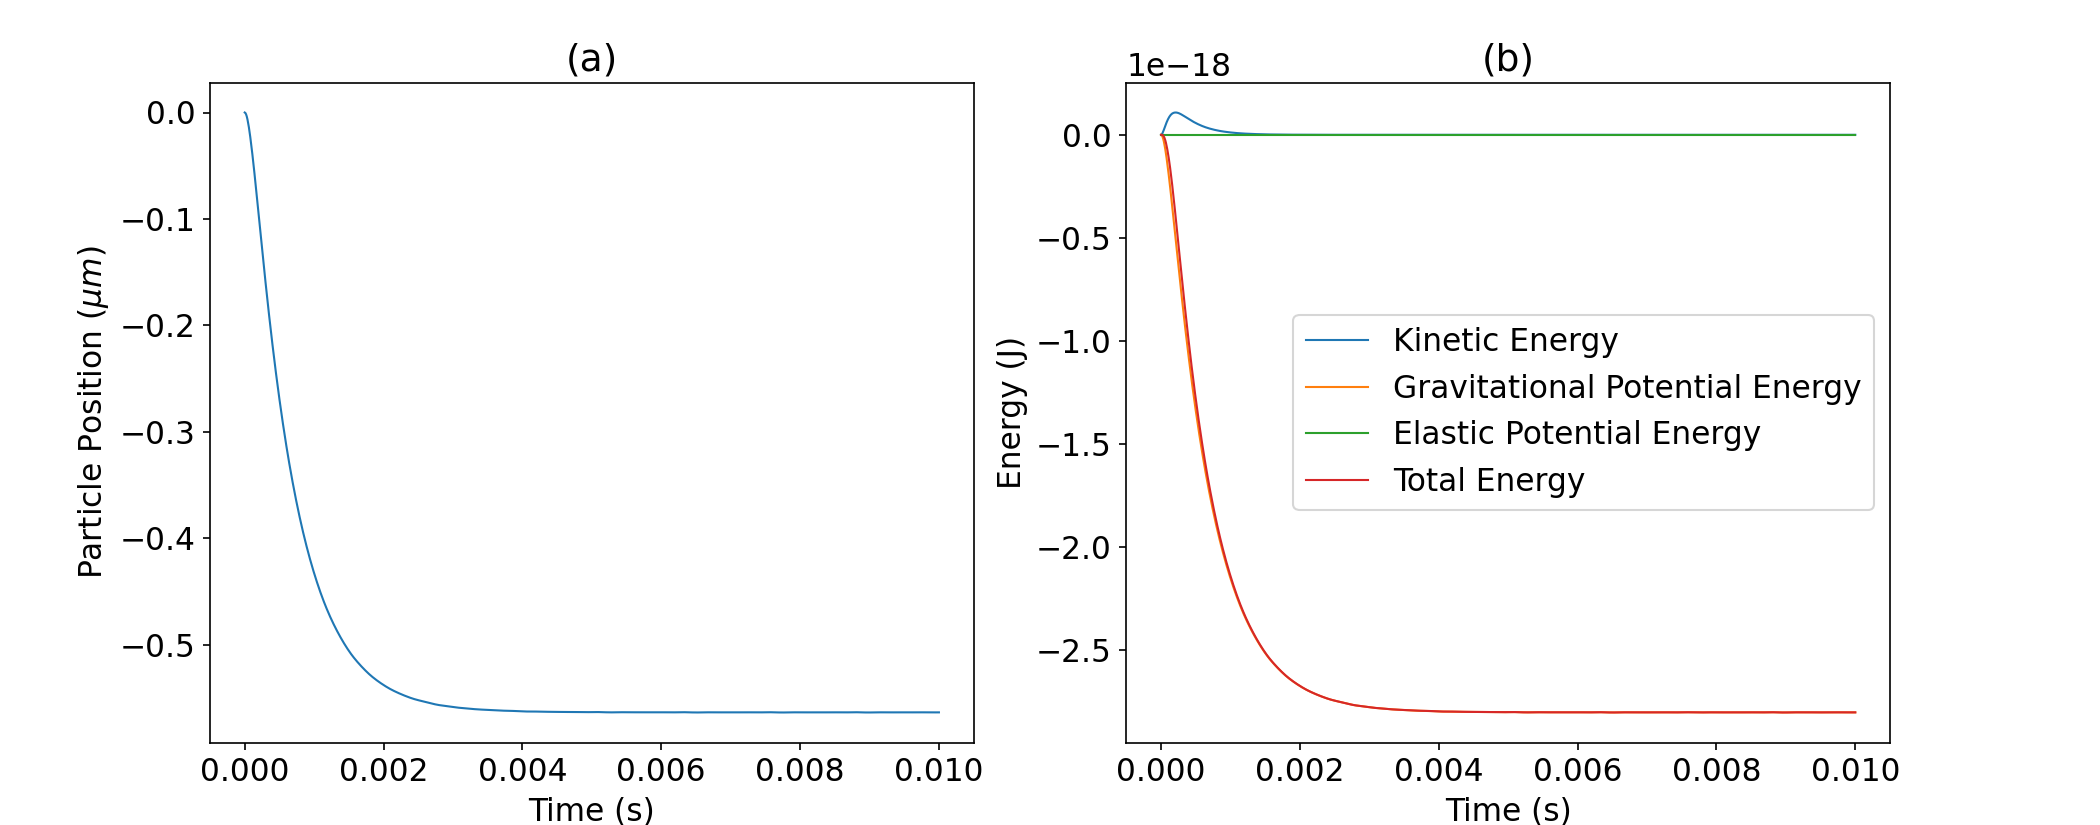

In [65]:
method = 'RK45'
t_space, x_sol, y_sol = solve_position(method)

plt.figure()

plt.rcParams["figure.figsize"] = (14,5.5)
plt.rcParams["font.size"] = 15

plt.subplot(121)
plt.xlabel("Time (s)")
plt.ylabel("Particle Position ($\mu$$m$)")
plt.title("(a)")
plt.plot(t_space, x_sol*1e6, linewidth=1)
#plt.plot(t_space, y_sol, linewidth=1, label='numerical y')
#plt.legend()
# check for aliasing
g = 9.81
m = 5.07e-13 #kg
k = 1.2509e-10#N/m

#Plot the energy
KE = 1/2 * m * y_sol **2 #kinetic energy
GPE = m * g * x_sol # gravitational potential energy
EPE = 1/2 * k * x_sol**2 # elastic potential energy
E =  KE + GPE + EPE

plt.subplot(122)#total energy
#plt.figure()
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.title("(b)")
plt.plot(t_space, KE, linewidth=1,label = 'Kinetic Energy')
plt.plot(t_space, GPE, linewidth=1,label = 'Gravitational Potential Energy')
plt.plot(t_space, EPE, linewidth=1,label = 'Elastic Potential Energy')
plt.plot(t_space, E, linewidth=1,label = 'Total Energy')
plt.legend(loc=0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)

plt.savefig('model 2.png')

In [40]:
#Residue between solvers

def solver_residue(method1,method2):
#method_1 = 'RK23'
    t_space_1, x_sol_1, y_sol_1 = solve_position(method1)
    t_space_2, x_sol_2, y_sol_2 = solve_position(method2)
    
    x_res = x_sol_1 - x_sol_2
    y_res = y_sol_1 - y_sol_2
    plt.figure()
    plt.rcParams["figure.figsize"] = (7,5)
    plt.rcParams["font.size"] = 12
    plt.ylabel("Residue")
    plt.xlabel("t (s)")
    plt.title("Residue between solvers (Position)")
    plt.plot(t_space_1,x_res,linewidth=1)
    
    plt.show()

<IPython.core.display.Javascript object>


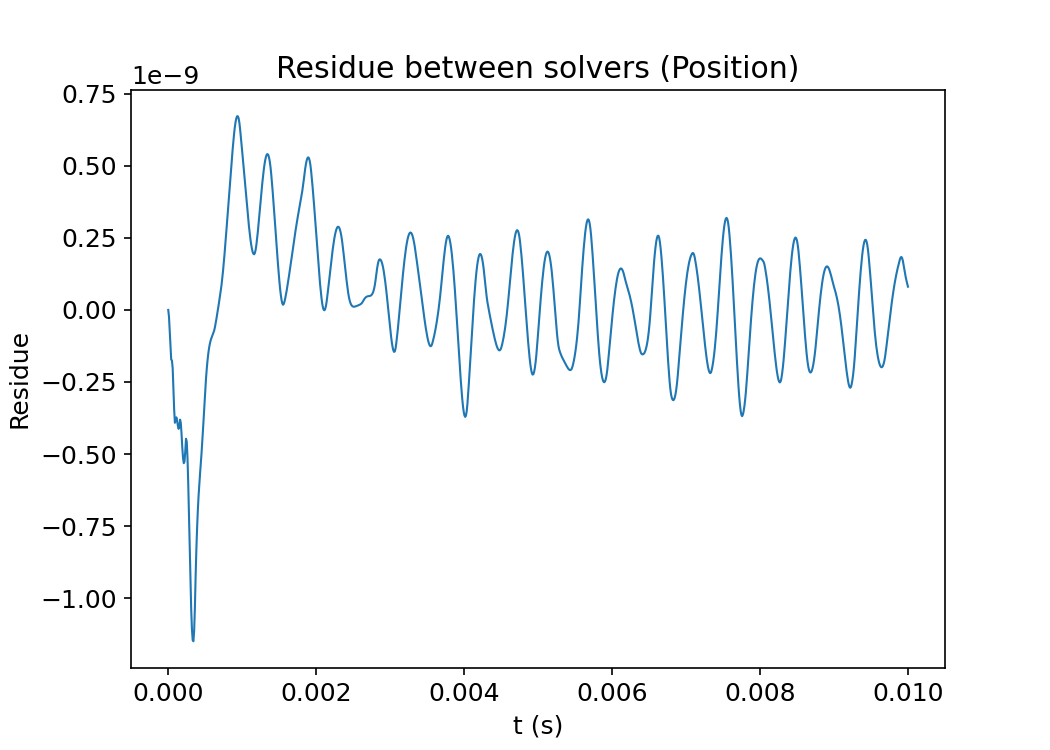

In [47]:
method1 = 'RK45'
method2 = 'RK23'
solver_residue(method1,method2)